# Median Filter

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.restoration import wiener

from bcd.utils.image import convert_uint8


In [2]:
FP_ORIG = "jbook/figures/mammogram.png"
CMAP = 'gray'

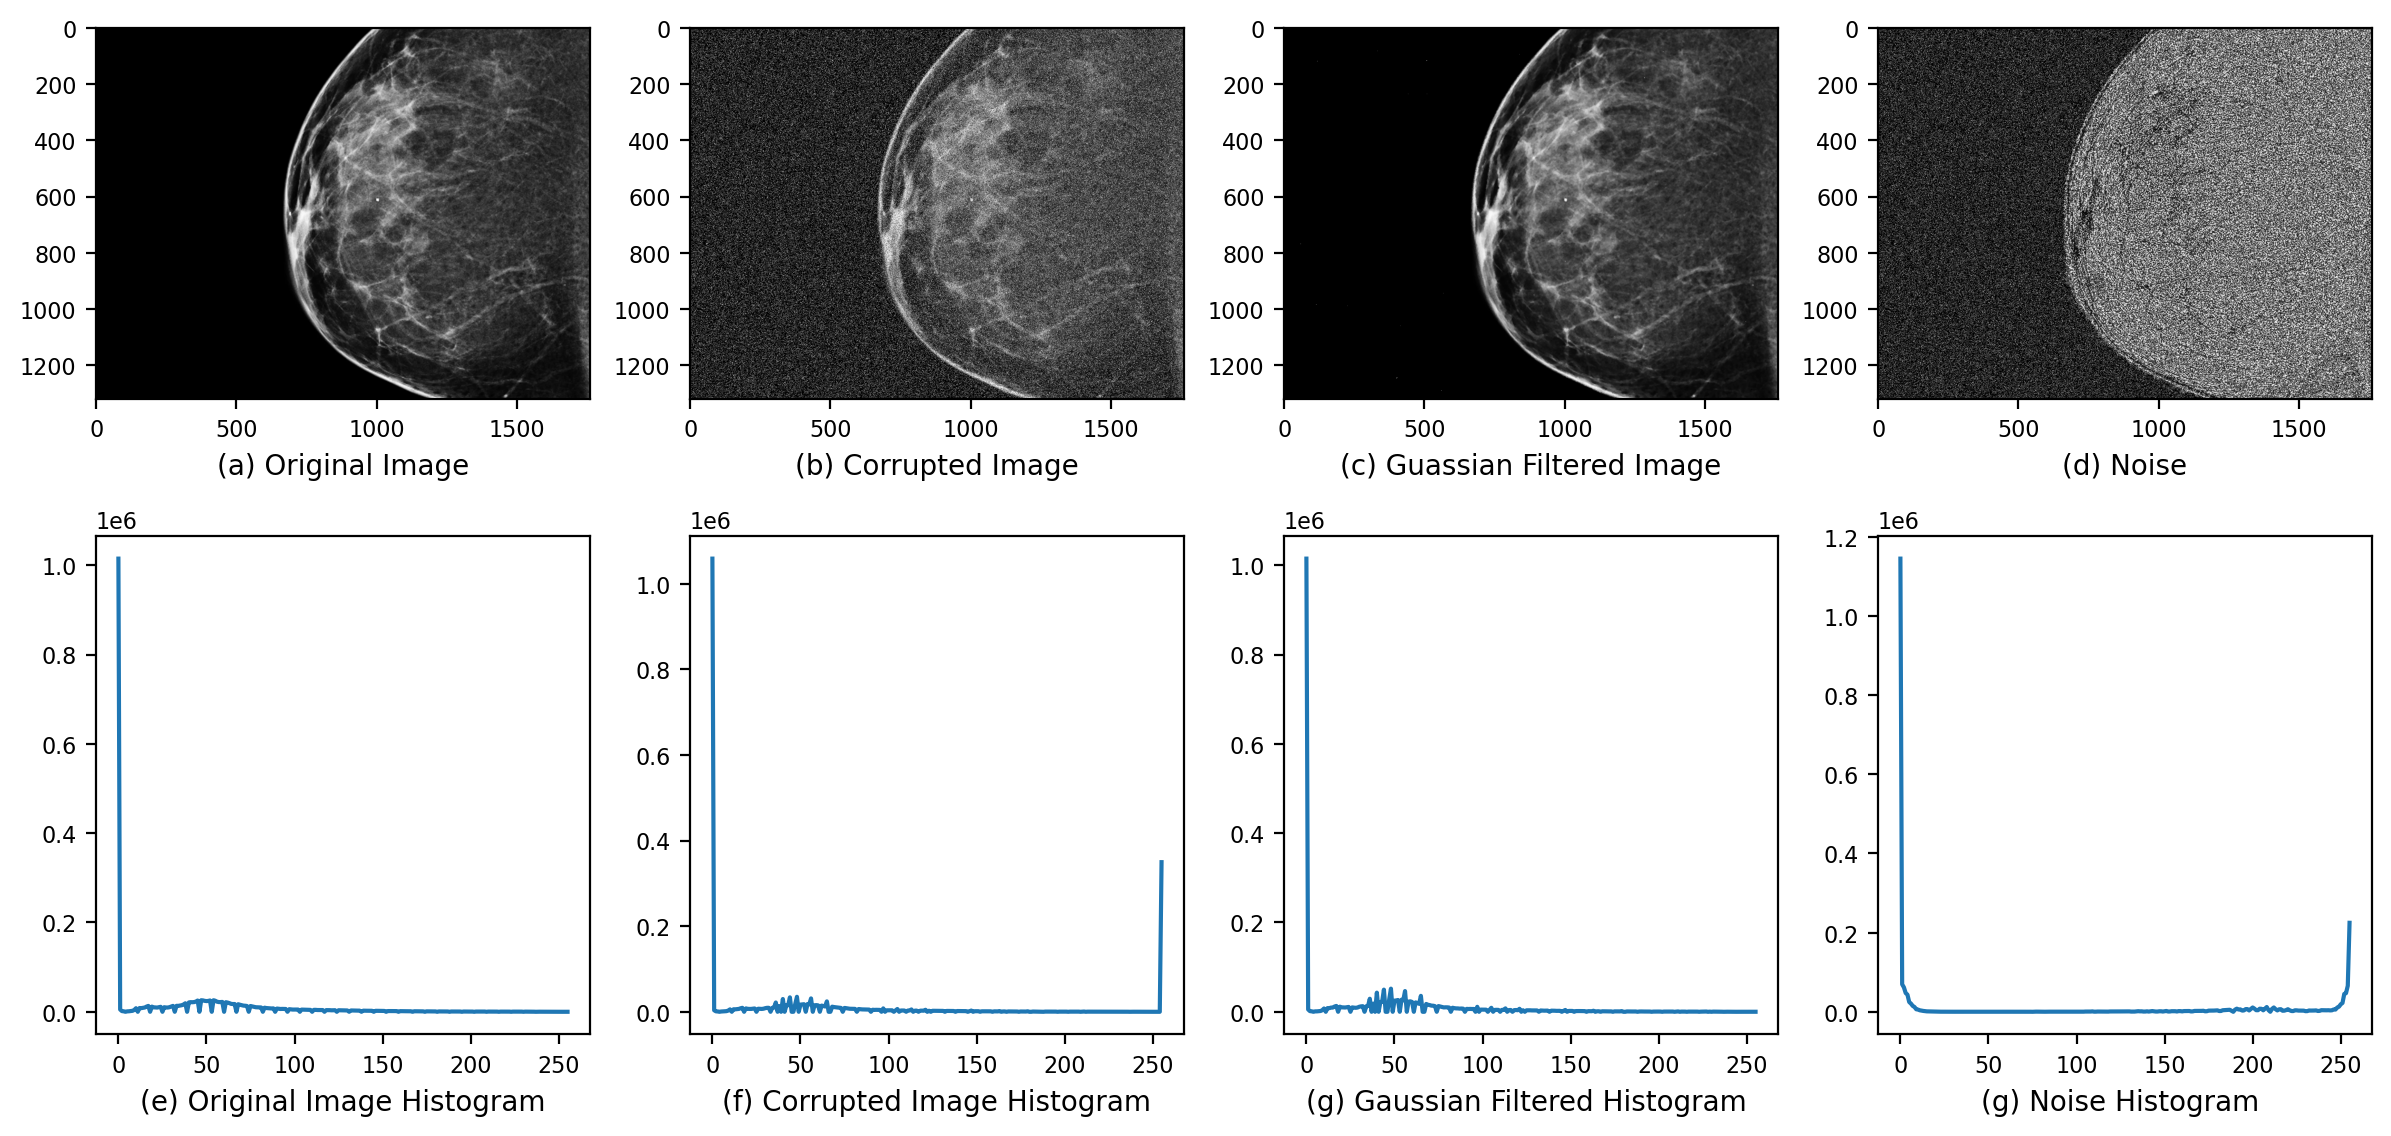

In [3]:
# Obtain the source image
fx = cv2.imread(FP_ORIG, cv2.IMREAD_GRAYSCALE)

# Add random salt and pepper noise
gx = random_noise(fx, mode='s&p', amount=0.30)
gx = convert_uint8(gx)
# gx = gx[:,:]

# Apply Median Filter
fx2 = cv2.medianBlur(gx,5)

# Subtract the noise
nx = gx - fx2

# Compute histograms
fx_hist = cv2.calcHist([fx], [0], None, [256], [0,256])
gx_hist = cv2.calcHist([gx], [0], None, [256], [0,256])
fx2_hist = cv2.calcHist([fx2], [0], None, [256], [0,256])
nx_hist = cv2.calcHist([nx], [0], None, [256], [0,256])

# Create Figure object
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12,6), dpi=200)

# Show images
_ = ax[0,0].imshow(fx, cmap=CMAP)
_ = ax[0,0].set_xlabel('(a) Original Image', fontsize=10)

_ = ax[0,1].imshow(gx, cmap=CMAP)
_ = ax[0,1].set_xlabel('(b) Corrupted Image', fontsize=10)

_ = ax[0,2].imshow(fx2, cmap=CMAP)
_ = ax[0,2].set_xlabel('(c) Guassian Filtered Image', fontsize=10)

_ = ax[0,3].imshow(nx, cmap=CMAP)
_ = ax[0,3].set_xlabel('(d) Noise', fontsize=10)

# Show histograms
_ = ax[1,0].plot(fx_hist)
_ = ax[1,0].set_xlabel("(e) Original Image Histogram", fontsize=10)

_ = ax[1,1].plot(gx_hist)
_ = ax[1,1].set_xlabel("(f) Corrupted Image Histogram", fontsize=10)

_ = ax[1,2].plot(fx2_hist)
_ = ax[1,2].set_xlabel("(g) Gaussian Filtered Histogram ", fontsize=10)

_ = ax[1,3].plot(nx_hist)
_ = ax[1,3].set_xlabel("(g) Noise Histogram ", fontsize=10)

plt.tight_layout()
plt.show()

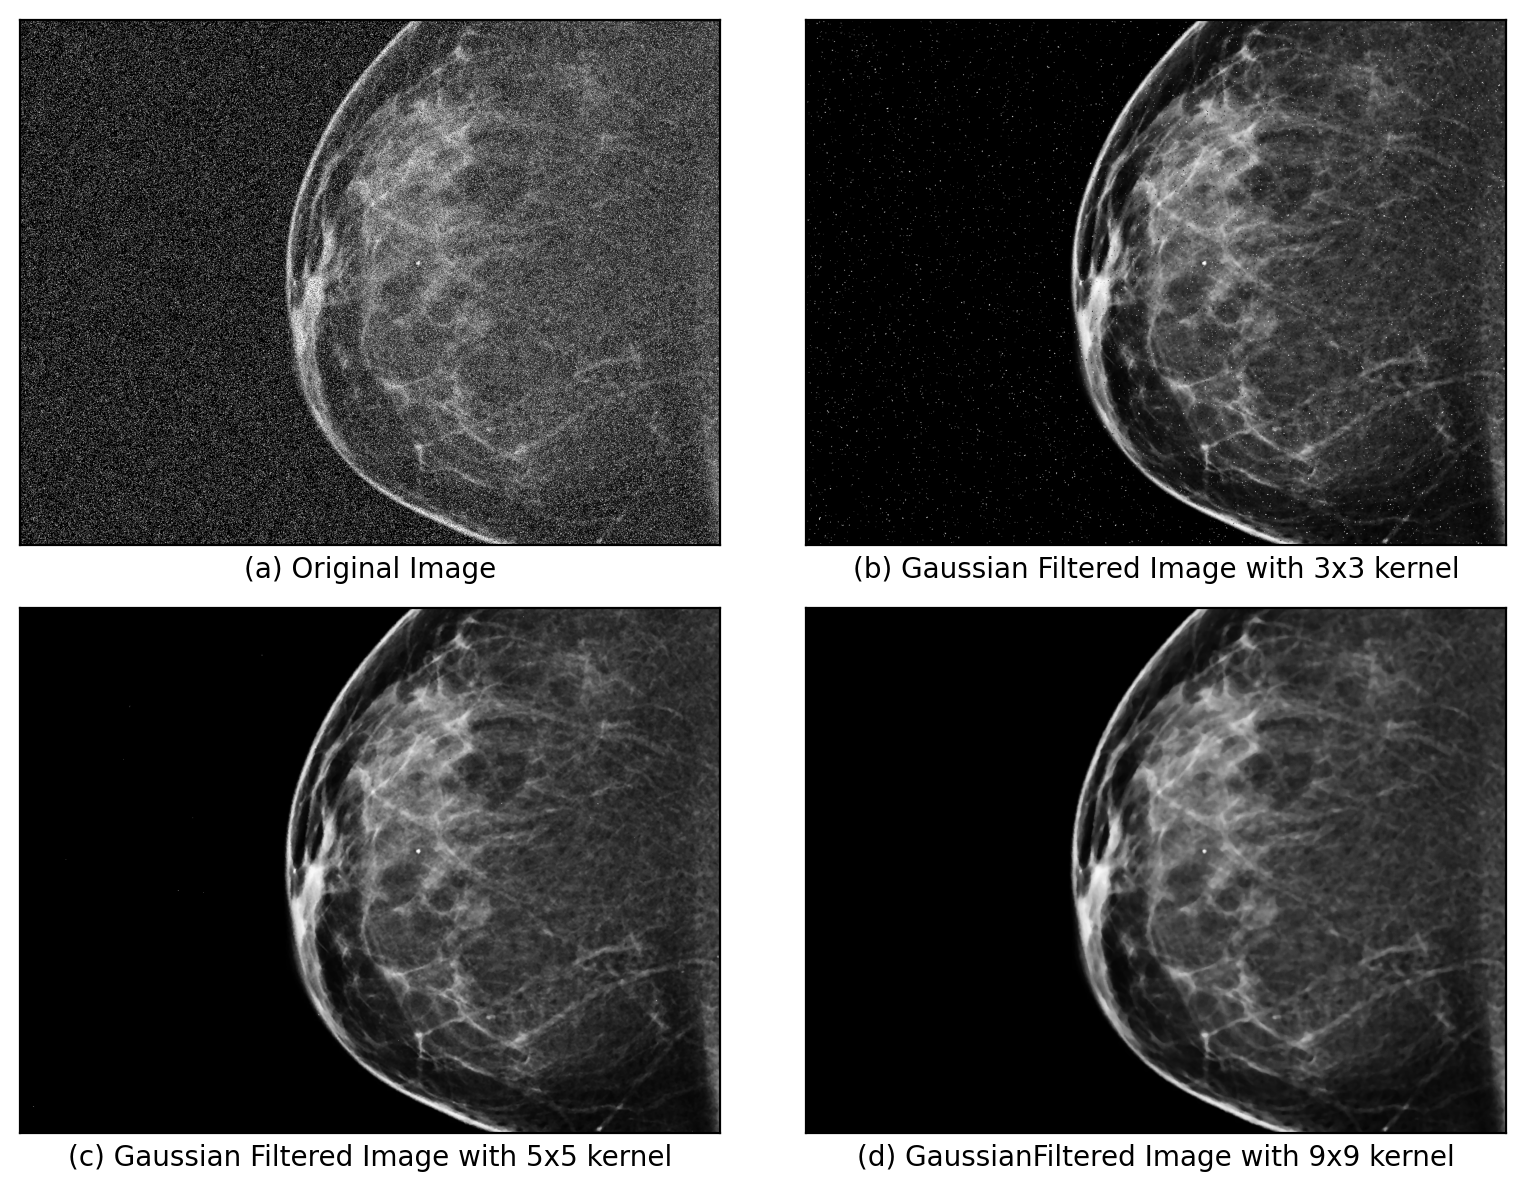

In [4]:
# Obtain the source image
orig = cv2.imread(FP_ORIG, cv2.IMREAD_GRAYSCALE)

# Add random Gaussian noise with zero mean and variance of 0.1
img_gaussian = random_noise(orig, mode='s&p', amount=0.3)
img_gaussian = convert_uint8(img_gaussian)

# Create images with varying kernel sizes.
img_1 = cv2.medianBlur(img_gaussian, 3)
img_2 = cv2.medianBlur(img_gaussian, 5)
img_3 = cv2.medianBlur(img_gaussian, 9)

# Create Figure object
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6), dpi=200)

# Show images
_ = ax[0,0].imshow(img_gaussian, cmap=CMAP)
_ = ax[0,0].set_xlabel('(a) Original Image', fontsize=10)
_ = ax[0,0].set_xticks([])
_ = ax[0,0].set_yticks([])

_ = ax[0,1].imshow(img_1, cmap=CMAP)
_ = ax[0,1].set_xlabel('(b) Gaussian Filtered Image with 3x3 kernel', fontsize=10)
_ = ax[0,1].set_xticks([])
_ = ax[0,1].set_yticks([])

_ = ax[1,0].imshow(img_2, cmap=CMAP)
_ = ax[1,0].set_xlabel('(c) Gaussian Filtered Image with 5x5 kernel', fontsize=10)
_ = ax[1,0].set_xticks([])
_ = ax[1,0].set_yticks([])

_ = ax[1,1].imshow(img_3, cmap=CMAP)
_ = ax[1,1].set_xlabel('(d) GaussianFiltered Image with 9x9 kernel', fontsize=10)
_ = ax[1,1].set_xticks([])
_ = ax[1,1].set_yticks([])

plt.tight_layout()
plt.show()